# Fancy inddexing
- Indexing is performed using **array of indices.**
- Makes accessing of array subsets super easy.
- Can also be combined with simple indexing.
- **Shape of resulted array is same as shape of index array.**

# Exploring Fancy Indexing

- We can operation 1D or Multidim indices array on 1D or Multidim data array.

In [49]:
import numpy as np

# 1D data array

rand = np.random.RandomState(42)
x = rand.randint(100, size=20)
x


array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37])

In [50]:
# Access multiple elements using indices
# 1D index array
ind = [3,2,7]
x[ind]

array([71, 14, 86])

In [51]:
# Multidim indices array on 1D data array 
ind = np.array([[3,7],
               [2,5]])
x[ind]

array([[71, 86],
       [14, 20]])

- Here, shape of resulted array is same as index array, not the input array.

In [53]:
# Multidimensional index array on multidim data array
x = x.reshape(5,4)
x

array([[51, 92, 14, 71],
       [60, 20, 82, 86],
       [74, 74, 87, 99],
       [23,  2, 21, 52],
       [ 1, 87, 29, 37]])

In [57]:
ind = [[1,2],
       [2,3]]
x[ind]

array([[[60, 20, 82, 86],
        [74, 74, 87, 99]],

       [[74, 74, 87, 99],
        [23,  2, 21, 52]]])

- The single ind is considered here as row.
- To get column wise result:

In [58]:
x[:,ind]

array([[[92, 14],
        [14, 71]],

       [[20, 82],
        [82, 86]],

       [[74, 87],
        [87, 99]],

       [[ 2, 21],
        [21, 52]],

       [[87, 29],
        [29, 37]]])

In [65]:
# define row and col array
row = np.array([1,3])
col = np.array([0,2])
x[row,col]

array([60, 21])

**Combined indexing**


In [67]:
# Simple and Fancy indexing
x[2,[1,2,3]]  # 2nd row's 1,2,3rd col elements

array([74, 87, 99])

In [69]:
# Slicing and Fancy indexing
x[1:, [2,0,1]]

array([[82, 60, 20],
       [87, 74, 74],
       [21, 23,  2],
       [29,  1, 87]])

In [96]:
# Standard indexing wirh row col and Fancy indexing
x

array([[51, 92, 14, 71],
       [60, 20, 82, 86],
       [74, 74, 87, 99],
       [23,  2, 21, 52],
       [ 1, 87, 29, 37]])

In [99]:
row = np.array([0,1,3])
col = np.array([2,3,1])
x[row, col]

array([14, 86,  2])

- In above example, pairing of indices follows all the broadcasting rules. 
- For example, if size of row and colu

In [100]:
x

array([[51, 92, 14, 71],
       [60, 20, 82, 86],
       [74, 74, 87, 99],
       [23,  2, 21, 52],
       [ 1, 87, 29, 37]])

In [112]:
row
print(row.shape)
row

(3,)


array([0, 1, 3])

In [110]:
row[:, np.newaxis]  # newaxis is used to increase dim of array by 1
print(row[:, np.newaxis].shape)
row[:, np.newaxis]


(3, 1)


array([[0],
       [1],
       [3]])

In [115]:
col = np.array([1,2])
print(col.shape)

(2,)


In [116]:
x[row[:, np.newaxis], col]

array([[92, 14],
       [20, 82],
       [ 2, 21]])

- Shapes of row[:, no.newaxis] is (3,1) and col is (2,).
- Here, broadcasting rule is applied as: col.shape = (1,2)
- Overall shape becomes for new row and col (3,2).
- Thus, elements of indexing are pairs of new row and col indices.

In [95]:
# Fancy indexing and masking
X = np.array([[ 0, 1, 2, 3],
              [ 4, 5, 6, 7],
              [ 8, 9, 10, 11]])
X


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [120]:
# Defining the row indices
row = np.array([0, 1, 2])

In [121]:
# Defining the mask (Boolean array)
mask = np.array([1, 0, 1, 0], dtype=bool)
mask

array([ True, False,  True, False])

In [122]:
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points
- Let's create a multivariate dataset using mean vector and covariance matrix.
  (To understand about multivaiate data distribution, see probability chapter of Data_science_from_scratch repository.)

In [145]:
rng = np.random.RandomState(42)
mean = np.array([0,0])
cov = np.array([[1,2],
       [2,5]])
x = rng.multivariate_normal(mean, cov, size=100)
x.shape  # 100 rows data for 2 variables

(100, 2)

- Above cov matrix represents, diagonal elements 2,2 means cov between both variables, which is postive.
- cov[0,0] and cov[1,1] are covariances of variables with themselves.

Text(0.5, 1.0, 'Normally distributed points')

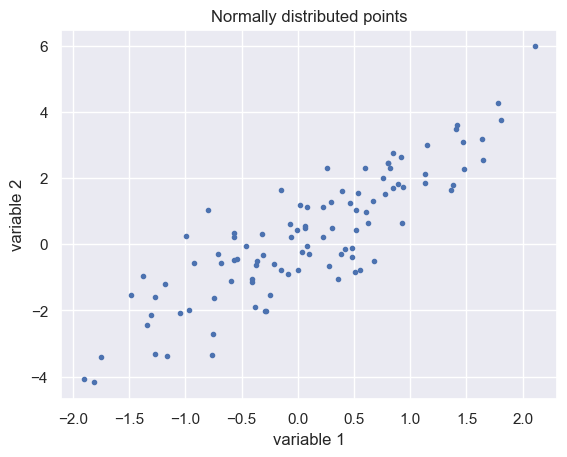

In [148]:
# Let's plot and see
import matplotlib.pyplot as plt 
import seaborn; seaborn.set_theme()

plt.scatter(x[:, 0], x[:, 1], marker='.')
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.title('Normally distributed points')

- Let's select 20 random points using Fancy indexing.
- Select 20 random indices with no repeat.

In [150]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([18, 29, 64, 98, 72, 88,  5, 15, 12, 17, 61, 76,  9, 78, 80,  7, 33,
        6, 37, 74])

In [154]:
selected_points = x[indices]
selected_points

array([[ 0.55696849, -0.77649078],
       [-0.67937246, -0.58422777],
       [ 0.10060593, -0.30207391],
       [ 0.75774974,  1.99576056],
       [-0.53929105, -0.4557248 ],
       [-0.56825559,  0.20140359],
       [ 0.60636918,  0.95980245],
       [-0.15293175,  1.63568156],
       [ 0.46049582,  1.231797  ],
       [-0.29273577, -2.02815831],
       [-0.75954778, -3.3510632 ],
       [ 0.53938128,  1.55357119],
       [ 1.37937009,  1.80142746],
       [-1.90507889, -4.08639424],
       [ 0.59928421,  2.2987343 ],
       [ 1.8087944 ,  3.75820034],
       [-0.31750674,  0.31968711],
       [ 0.50863666, -0.84296209],
       [ 2.10580041,  5.97347277],
       [-0.59586224, -1.11708482]])

- Let's circle the selected points in scatter plot.

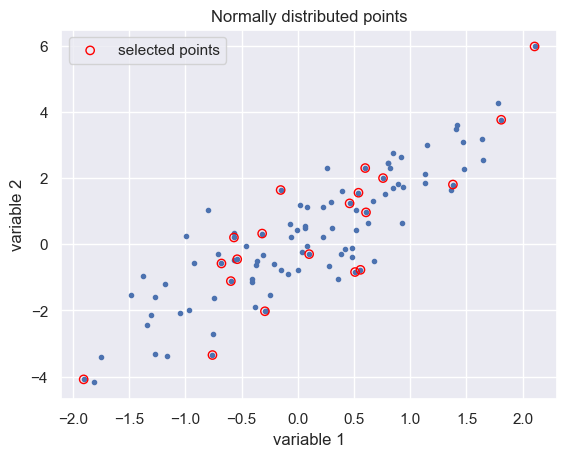

In [165]:
plt.scatter(x[:,0], x[:,1], marker = '.')
plt.scatter(selected_points[:,0], selected_points[:,1],edgecolors='red', facecolor='none', linewidths=1, label= 'selected points')
plt.xlabel('variable 1')
plt.ylabel('variable 2')
plt.title('Normally distributed points')
plt.legend()

- These strategies are very useful when we need to partition data quickly, e.g in train/test splitting.
- Also used during sampling of big dataset when answering statistical questions.

# Modifying Values with Fancy Indexing

- We can also modify the values of array using fancy indexing.

In [172]:
# 1. Simple modification of elements using Fancy indexing
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [173]:
i = np.array([2,1,8,4])

In [174]:
x[i] = 99 
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

- It replaces x values at indices [2,1,8,4] to 99.

In [175]:
# 2. Using assignment type operator
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [176]:
i

array([2, 1, 8, 4])

In [178]:
x[i] -=10
x

array([ 0, 79, 79,  3, 79,  5,  6,  7, 79,  9])

In [180]:
# 3. With repeated indices- unexpected resullts
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [182]:
x[[1,1]] = [2,6]
x

array([0., 6., 0., 0., 0., 0., 0., 0., 0., 0.])

Here, when we put same index two times for modification, the index is first modified to 2, then to 6, therefore we get 6.

In [183]:
# Another Example of Unexpected Result
x

array([0., 6., 0., 0., 0., 0., 0., 0., 0., 0.])

In [184]:
i  = [2, 3, 3, 4, 4, 4]
i

[2, 3, 3, 4, 4, 4]

In [186]:
x[i] +=1
x

array([0., 6., 2., 2., 2., 0., 0., 0., 0., 0.])

- Repeated indices are modified again and again as per their number of repeations.

In [204]:
# Using ufuncs.at() for in place operations

x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [205]:
i = np.array([3,4,5])
i

array([3, 4, 5])

In [206]:
np.add.at(x, i, 1)

In [207]:
x

array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0.])

- We can also use np.unfunc.reduceeat() for this purpose.

## Binning data

- To divide data efficiently in bins, we can use ufunct.at().

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.random.randn(100)   # Get random samples from standard normal distribution
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [3]:
# Define bins
bins = np.linspace(-5,5,20)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [4]:
# Initialize Count array
counts = np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
i = np.searchsorted(bins, x)  # Index where to insert x value in bins to maintain order.
i

array([11, 10, 11, 13, 10, 10, 13, 11,  9, 11,  9,  9, 10,  6,  7,  9,  8,
       11,  8,  7, 13, 10, 10,  7,  9, 10,  8, 11,  9,  9,  9, 14, 10,  8,
       12,  8, 10,  6,  7, 10, 11, 10, 10,  9,  7,  9,  9, 12, 11,  7, 11,
        9,  9, 11, 12, 12,  8,  9, 11, 12,  9, 10,  8,  8, 12, 13, 10, 12,
       11,  9, 11, 13, 10, 13,  5, 12, 10,  9, 10,  6, 10, 11, 13,  9,  8,
        9, 12, 11,  9, 11, 10, 12,  9,  9,  9,  7, 11, 10, 10, 10])

- This output means - insert 0.49 at bins[11] position.

In [6]:
np.add.at(counts, i, 1)  # Similar to values of Counter(i) in python
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

In [12]:
from collections import Counter
pyth_counter= Counter(i)
pyth_counter

Counter({np.int64(9): 23,
         np.int64(10): 22,
         np.int64(11): 17,
         np.int64(12): 10,
         np.int64(8): 9,
         np.int64(13): 7,
         np.int64(7): 7,
         np.int64(6): 3,
         np.int64(14): 1,
         np.int64(5): 1})

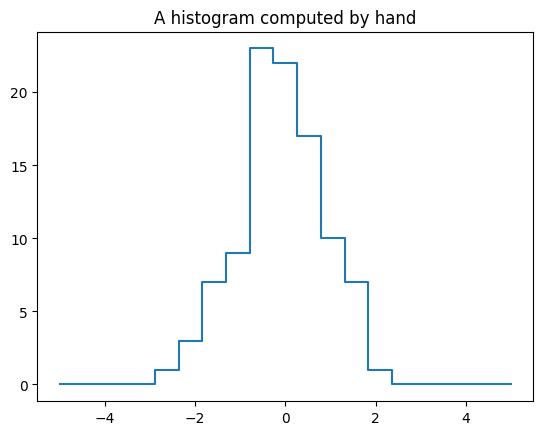

In [20]:
# Plot bins
plt.plot(bins, counts, drawstyle='steps')
plt.title('A histogram computed by hand')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

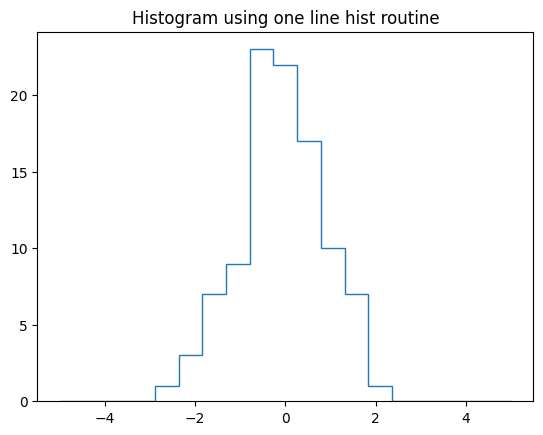

In [23]:
# Using plt.hist in one line
plt.hist(x, bins, histtype='step')
plt.title('Histogram using one line hist routine')
plt.show

In [27]:
# Let's compare the time taken by above two computations.
print('Custom Routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Custom Routine:
42.4 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
print('Numpy Routine:')
%timeit counts, edges = np.histogram(x, bins)

Numpy Routine:
24.4 ms ± 305 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Here, Numpy routine is taking more time than normal one, but for large datasets Numpy performs better.

In [29]:
x = np.random.randn(1000000)

print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)


NumPy routine:
24.8 ms ± 516 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
42.5 ms ± 194 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
